In [ ]:
#  os.makedirs('/content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand')

In [ ]:
# path = "/content/drive/MyDrive/aiffel_research_interview/Data/kaggle.json"

In [ ]:
# with open(path) as f:
#     os.environ['KAGGLE_USERNAME'] = 'jiwoongyang960923'
#     os.environ['KAGGLE_KEY'] = 'ab01d00fe475ffd306225cf052ca508b'

In [ ]:
# ! kaggle competitions download -c bike-sharing-demand -p {'/content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand'}

In [ ]:
# !unzip -q /content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand/bike-sharing-demand.zip -d /content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand/

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand/train.csv")
test = pd.read_csv("/content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand/test.csv")

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
test
### 1~19일 :train, 20~말일 : test
### 이런식으로 시간의 흐름을 절단시키면... 시간 흐름을 통한 데이터의 추세 파악이 어렵다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
(train['casual'] + train['registered'] == train['count']).value_counts()

,count
True,10886


In [ ]:
train.info()
# datetime dtype : object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# **변수설명**
* datetime : 시간 단위 날짜
* season : 계절 (1,2,3,4) -> (봄,여름,가을,겨울)
* holiday : 해당 날짜가 공휴일인지
* workingday : 해당 날짜가 주말이나 공휴일이 아닌 근무일인지
* weater : 날씨 상황 (1,2,3,4) -> (맑음,흐림,약간의 눈+약간의 비, 폭우+눈+얼음 알갱이)
* temp : 섭씨 온도
* atemp : 체감 온도(섭씨)
* humidity : 상대 습도
* windspeed : 풍속
* casual : 비회원 사용자 대여 수
* registered : 회원 사용자 대여 수
* count : 총 대여 수

# **데이터 파악**

* Bike Sharing Demand 데이터는 미국의 워싱턴 D.C.의 자전거 공유 시스템인 Capital Bikeshare에서 수집된 데이터이다.
* 워싱턴 D.C.는 일교차가 큰 온대 기후 지역이며 특히, 가을과 봄에 크다.
* 여름에는 높은 습도와 평균 기온 25~32도 소나기가 잦다.
* 겨울에는 기온은 낮으나 습도가 높을 수 있고 눈과 비가 혼합된 강수량이 있을 수 있다.

## 자전거 대여 수의 분석 결과 예상
* 근무일(근무 시간)에는 적을 것
* 공휴일에 많을 것
* 겨울에는 적을 것
* 더 세부적으로는 봄과 가을이 더 많을 것.
* 날씨는 1과 2의 경우에 많을 것
* 섭씨 온도와 체감 온도 및 상대 습도와 풍속은 적정 수준일 때, 많을 것
-> 내가 만약 자전거를 애용하는 사람이라면(탈 수 밖에 없는 상황에 있다면), 어느 정도의 악조건은 자전거 대여에 영향을 미치지 않을 수도 있겠다.
* 회원 비회원이 대여에 미치는 영향은 데이터 분석을 진행해봐야 알 것 같다.


## 목적 : 종속 변수(타겟)
* count = 이산형 변수
* 예측이나 분류를 진행할 때, 종속변수를 어떻게 볼 것인가를 정하는 것은 모델링의 기반을 정하는 것과 같다.
* 종속변수를 어떻게 볼 것인가-는 학술적인 의미에서는 좋은 설명력과 좋은 예측력을 동시에 지닌 모델로 직결되겠지만.
* 만약에, Capital Bikeshare 에서 위 데이터로 구축된 모델을 통해 이윤 창출에 변화를 준다거나 특정 BM에 접목시킬려는 요량이라면.
-> 해당 도메인 지식을 정확하게 이해하여야하며, 종속 변수를 바라보는 시각은 파생과 전처리를 통해 얼마든지 변화할 수 있다.

In [ ]:
train.describe()
# 음수값 없음
# count의 최솟값이 1이다.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# datetime 의 dtype 을 datetime 으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month # 사계절
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.day_of_week # 토요일,일요일
train['hour'] = train['datetime'].dt.hour # 아침 점심 저녁 새벽

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,22


In [ ]:
# target = 'count'
# columns = [col for col in train.columns if col != target] + [target]
# columns
# train = train[columns]

In [ ]:
train['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

In [ ]:
### 요일 변수를 전처리에 있어 더 직관적이게 변경
train['dayofweek'] = train['dayofweek'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed',
                                                  3: 'Thu', 4: 'Fri', 5: 'Sat',
                                                  6: 'Sun'})
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Sat,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Sat,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Sat,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Sat,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Sat,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wed,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,Wed,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,Wed,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,Wed,22


### 시간대별 차이

In [ ]:
# 시간대별 대여 수
train.groupby(train['hour'])['count'].sum()
# 한창 피크 시간(12시~20시) 때의 대여수와 비교하여 생각하면 자정 이후에 자전거 대여도 사실 아주 없는 편은 아니다.
# 또, 한국에서는 자전거를 이용하는 사람이 많지 않아 놓친 부분은 의외로 학교,회사 등에 출퇴근 시간에 자전거를 이용하는 인원이 많다는 점이다.

,count
hour,
0,25088
1,15372
2,10259
3,5091
4,2832
5,8935
6,34698
7,96968
8,165060


### 근무일 vs 비근무일

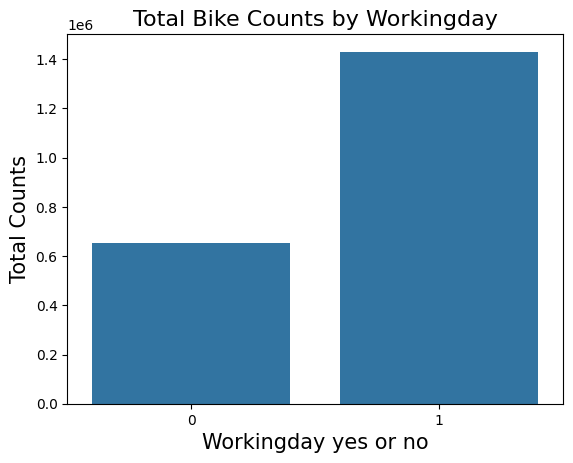

In [ ]:
workingday_counts = train.groupby('workingday')['count'].sum().reset_index()
sns.barplot(x='workingday', y='count', data=workingday_counts)

plt.xlabel('Workingday yes or no', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
plt.title('Total Bike Counts by Workingday', fontsize=16)
plt.show()
# 유추하기로 워싱턴 D.C는 출퇴근에 자전거를 이용하는 인원이 상당히 많다.

In [ ]:
### count 수 자체의 차이가 있다.
daily_counts = train.groupby(['workingday', train['datetime'].dt.date])['count'].sum().reset_index()
daily_counts.columns = ['workingday', 'datetime', 'count']
daily_counts['datetime'] = pd.to_datetime(daily_counts['datetime'])
workingday_0 = daily_counts[daily_counts['workingday'] == 0]
workingday_1 = daily_counts[daily_counts['workingday'] == 1]

# 토요일,일요일의 비율
print(f'비근무일 : {len(workingday_0)}')
print(f'근무일 : {len(workingday_1)}')
print(145/456)
print(2/7)

비근무일 : 145
근무일 : 311
0.31798245614035087
0.2857142857142857


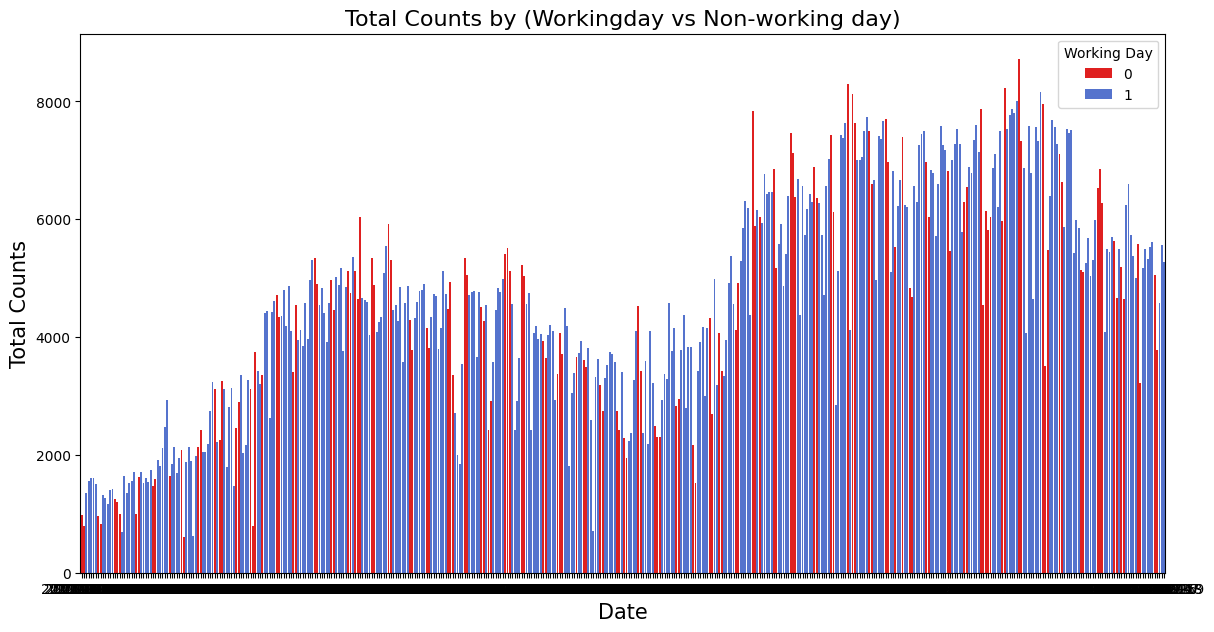

In [ ]:
combined_data = pd.concat([workingday_0, workingday_1])
combined_data.sort_values(by='datetime', inplace=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='datetime', y='count', hue='workingday', data=combined_data, palette={0: 'red', 1: 'royalblue'})

plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
plt.title('Total Counts by (Workingday vs Non-working day)', fontsize=16)

plt.legend(title='Working Day')
plt.show()

### 만약에 시계열적으로 본다면 의미가 더욱 있을 것이다.

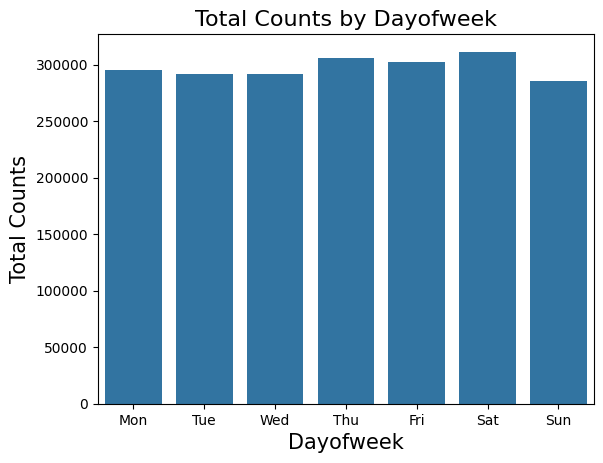

In [ ]:
dayofweek_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
holiday_counts = train.groupby('dayofweek')['count'].sum().reset_index()
sns.barplot(x='dayofweek', y='count', data=holiday_counts,order = dayofweek_order)

plt.xlabel('Dayofweek', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
plt.title('Total Counts by Dayofweek', fontsize=16)
plt.show()
# 생각만큼 토요일,일요일 자전거 대여 수가 크지 않다.
# 아마도 2011년,2012년 따로 Count를 세야한다.

### 공휴일 vs 비공휴일

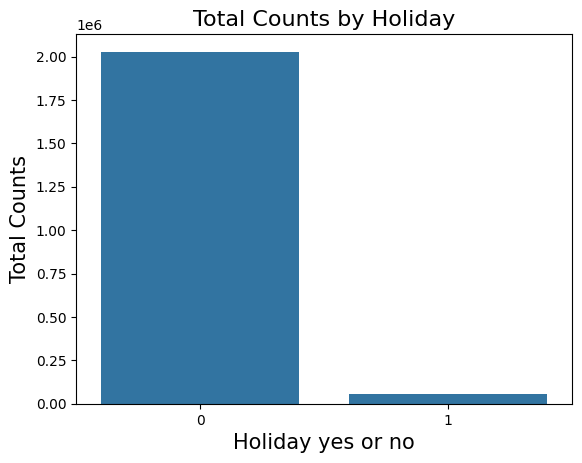

In [ ]:
holiday_counts = train.groupby('holiday')['count'].sum().reset_index()
sns.barplot(x='holiday', y='count', data=holiday_counts)

plt.xlabel('Holiday yes or no', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
plt.title('Total Counts by Holiday', fontsize=16)
plt.show()

# 공휴일에 워싱턴 D.C 에서 자전거를 타는 인원은 많이 없다.
# 불균형 너무 심하기 때문에 독립 변수에서 빼는게 나을 수 있다
# 200만 vs 6만?

In [ ]:
train[train['holiday'] == 1] # 시간대별로 나누면 약 13일.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17,2011,1,17,Mon,0
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16,2011,1,17,Mon,1
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8,2011,1,17,Mon,2
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2,2011,1,17,Mon,3
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3,2011,1,17,Mon,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,2012-11-12 19:00:00,4,1,0,1,22.14,25.760,73,19.0012,30,323,353,2012,11,12,Mon,19
10258,2012-11-12 20:00:00,4,1,0,2,21.32,25.000,77,19.0012,31,273,304,2012,11,12,Mon,20
10259,2012-11-12 21:00:00,4,1,0,3,22.14,25.760,73,15.0013,10,145,155,2012,11,12,Mon,21
10260,2012-11-12 22:00:00,4,1,0,1,21.32,25.000,77,16.9979,12,100,112,2012,11,12,Mon,22


In [ ]:
311/24

12.958333333333334

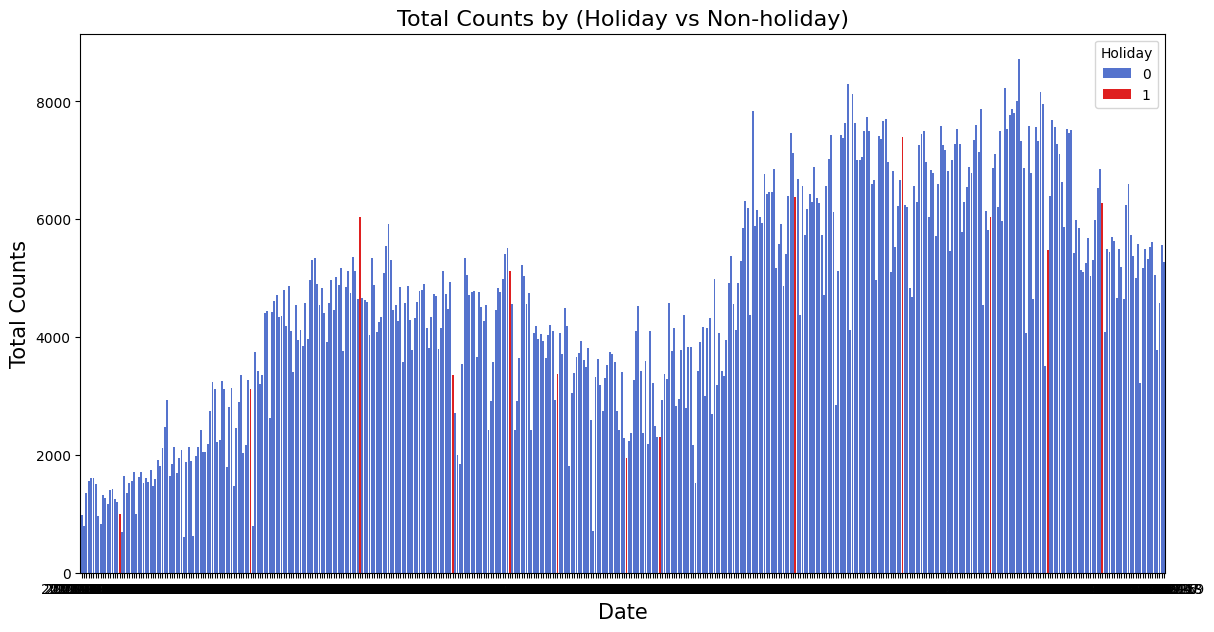

In [ ]:
daily_counts = train.groupby(['holiday', train['datetime'].dt.date])['count'].sum().reset_index()
daily_counts.columns = ['holiday', 'datetime', 'count']
daily_counts['datetime'] = pd.to_datetime(daily_counts['datetime'])
holiday_0 = daily_counts[daily_counts['holiday'] == 0]
holiday_1 = daily_counts[daily_counts['holiday'] == 1]

combined_data = pd.concat([holiday_0, holiday_1])
combined_data.sort_values(by='datetime', inplace=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='datetime', y='count', hue='holiday', data=combined_data, palette={0: 'royalblue', 1: 'red'})

plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
plt.title('Total Counts by (Holiday vs Non-holiday)', fontsize=16)

plt.legend(title='Holiday')
plt.show()

### Day

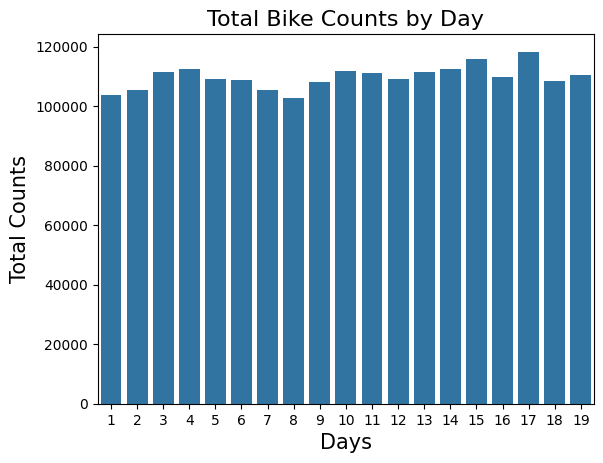

In [ ]:
day_counts = train.groupby('day')['count'].sum().reset_index()
sns.barplot(x='day', y='count', data=day_counts)

plt.xlabel('Days', fontsize=15)
plt.ylabel('Total Counts', fontsize=15)
plt.title('Total Bike Counts by Day', fontsize=16)
plt.show()
## 19일에서 끊겼기 때문에...
## test가 20일부터 시작하는 큰 수이기도 하고 더욱이 일자 자체에 의미가 있지 않다.
## 원 핫 인코딩을 진행하지 않는 한 데이터의 오류가 발생 & 원-핫 인코딩을 할 가치가 있는 변수인가?

### 계절

<Axes: xlabel='season', ylabel='count'>

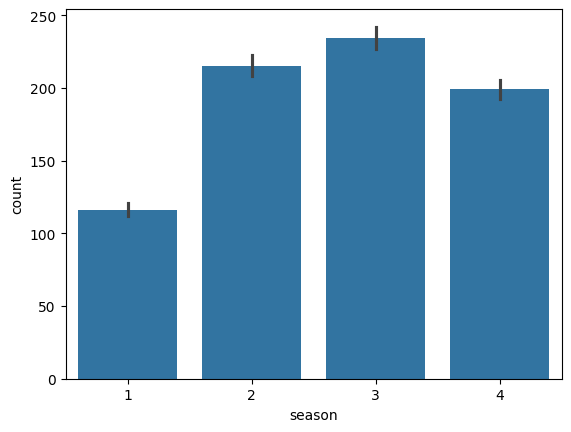

In [ ]:
# 봄이 생각보다 적다.
sns.barplot(x='season', y='count', data=train)

In [ ]:
train['season'] = train['month'].apply(lambda x: 1 if x in [3,4,5] else
                                        2 if x in [6,7,8] else
                                        3 if x in [9,10,11] else
                                          4)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Sat,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Sat,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Sat,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Sat,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Sat,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wed,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,Wed,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,Wed,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,Wed,22


<Axes: xlabel='season', ylabel='count'>

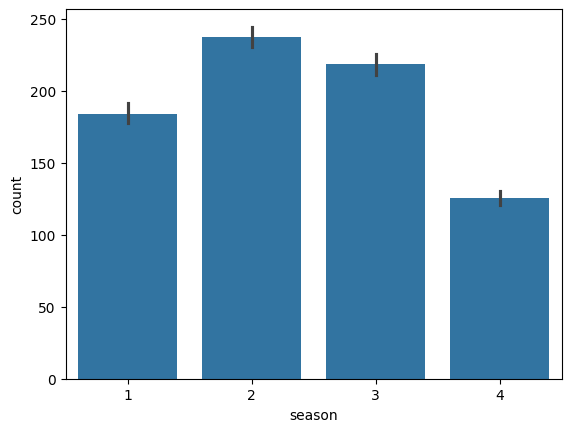

In [ ]:
# 그럼에도? 봄이 생각보다 적다.
sns.barplot(x='season', y='count', data=train)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# 년도, 월별, 시간대별 카운트 수
train.groupby([train['year'],train['month'],train['day']])['count'].sum()
# 2011년도와 2012년도 3월만 비교

year  month  day
2011  1      1       985
             2       801
             3      1349
             4      1562
             5      1600
             6      1606
             7      1510
             8       959
             9       822
             10     1321
             11     1263
             12     1162
             13     1406
             14     1421
             15     1248
             16     1204
             17     1000
             18      683
             19     1650
      2      1      1360
             2      1526
             3      1550
             4      1708
             5      1005
             6      1623
             7      1712
             8      1530
             9      1605
             10     1538
             11     1746
             12     1472
             13     1589
             14     1913
             15     1815
             16     2115
             17     2475
             18     2927
             19     1635
      3      1      1851
             2      2134
             3      1685
             4      1944
             5      2077
             6       605
             7      1872
             8      2133
             9      1891
             10      623
             11     1977
             12     2132
             13     2417
             14     2046
             15     2056
             16     2192
             17     2744
             18     3239
             19     3117
      4      1      2227
             2      2252
             3      3249
             4      3115
             5      1795
             6      2808
             7      3141
             8      1471
             9      2455
             10     2895
             11     3348
             12     2034
             13     2162
             14     3267
             15     3126
             16      795
             17     3744
             18     3429
             19     3204
      5      1      3351
             2      4401
             3      4451
             4      2633
             5      4433
             6      4608
             7      4714
             8      4333
             9      4362
             10     4803
             11     4182
             12     4864
             13     4105
             14     3409
             15     4553
             16     3958
             17     4123
             18     3855
             19     4575
      6      1      3974
             2      4968
             3      5312
             4      5342
             5      4906
             6      4548
             7      4833
             8      4401
             9      3915
             10     4586
             11     4966
             12     4460
             13     5020
             14     4891
             15     5180
             16     3767
             17     4844
             18     5119
             19     4744
      7      1      5362
             2      5119
             3      4649
             4      6043
             5      4665
             6      4629
             7      4592
             8      4040
             9      5336
             10     4881
             11     4086
             12     4258
             13     4342
             14     5084
             15     5538
             16     5923
             17     5302
             18     4458
             19     4541
      8      1      4266
             2      4845
             3      3574
             4      4576
             5      4866
             6      4294
             7      3785
             8      4326
             9      4602
             10     4780
             11     4792
             12     4905
             13     4150
             14     3820
             15     4338
             16     4725
             17     4694
             18     3805
             19     4153
      9      1      5115
             2      4727
             3      4484
             4      4940
             5      3351
             6      2710
             7      1996
        

In [ ]:
pd.reset_option('all')

<ipython-input-1363-056908e7e3ef>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


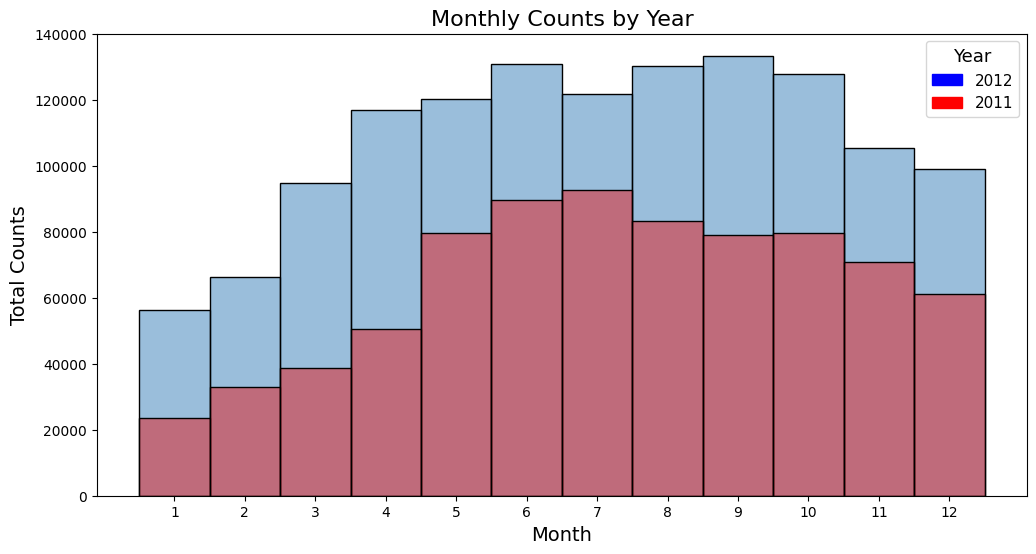

In [ ]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='month', weights=train['count'], hue='year', multiple='layer', palette='Set1', bins=12, discrete=True)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Counts', fontsize=14)
plt.title('Monthly Counts by Year', fontsize=16)
plt.xticks(ticks=range(1, 13), labels=[1,2,3,4,5,6,7,8,9,10,11,12])

red_patch = mpatches.Patch(color='red', label='2011')
blue_patch = mpatches.Patch(color='blue', label='2012')
plt.legend(handles=[blue_patch, red_patch], title='Year', title_fontsize='13', fontsize='11')

plt.show()

## 년도별 데이터의 차이가 이렇게 크면 예측을 하는데 year 변수가 과도한 긍정 요인으로 작용할 수 있다.

In [ ]:
### 원인 !?
### 확인해보니까 Capital Bikeshare 회사가 2010년 10월 경에 설립된 회사!
### 첫 년도에는 회사의 여건 상 인프라 구축 및 시행착오가 있었을 수 있다.
### 당장의 2011년,2012년 데이터를 테스트하는데엔 효과적일 수 있으나 장기적인 데이터를 가지고 예측하는 관점에서는 year 변수를 사용하기엔 변수가 너무 많다.

### 회원 vs 비회원

In [ ]:
# 비회원 대여 수가 2배 가까이 많다.
train['casual'].sum(), train['registered'].sum()
# 시작과 끝이 비슷한 비율로 유지되었다면? 해당 변수를 더 고려할 사항이 있었을까-싶지만, 압도적인 비율 차이 때문에 빼야한다고 생각한다.

(392135, 1693341)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Sat,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Sat,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Sat,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Sat,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Sat,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wed,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,Wed,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,Wed,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,Wed,22


### 날씨

<Axes: xlabel='weather', ylabel='count'>

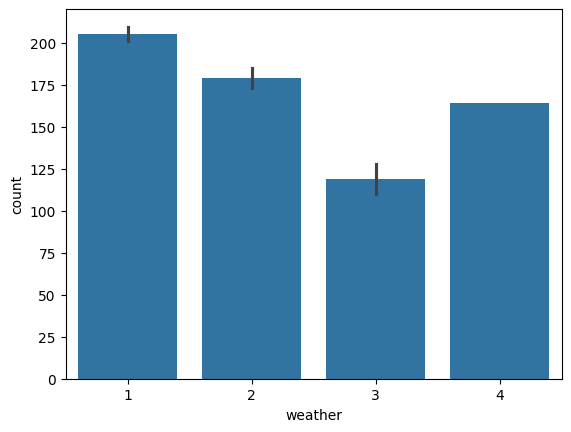

In [ ]:
sns.barplot(x='weather', y='count', data=train)
# 3 : 약한 눈 or 약한 비, 4 : 폭우, 폭설에도 타는 인원이 많다?
# 우리나라와는 다르다. 장마 X

In [ ]:
train['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


 ### 풍속 windspeed

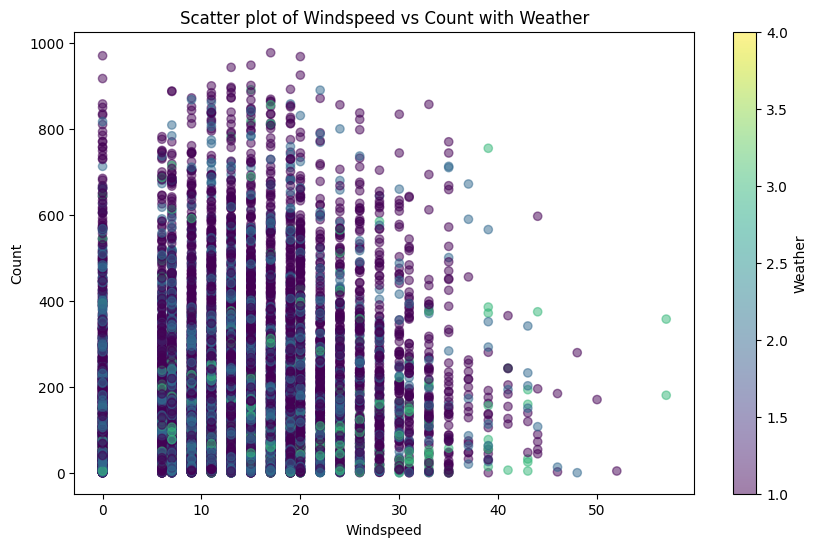

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=train['windspeed'], y=train['count'], c=train['weather'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Weather')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.title('Scatter plot of Windspeed vs Count with Weather')
plt.show()

### 측정을 하지 못해 0 값이라는 뜻은 기계적 결함 등 따위의 이유가 아니라, 시간 당 풍속이 굉장히 미미해서 0값인 경우가 많을 것이다.
### 국한된 지식일수도 있겠으나 워싱턴DC의 도심 속 풍속 수준은 크지 않을 것.
### 30 넘어가면 강풍

### 온도 temp

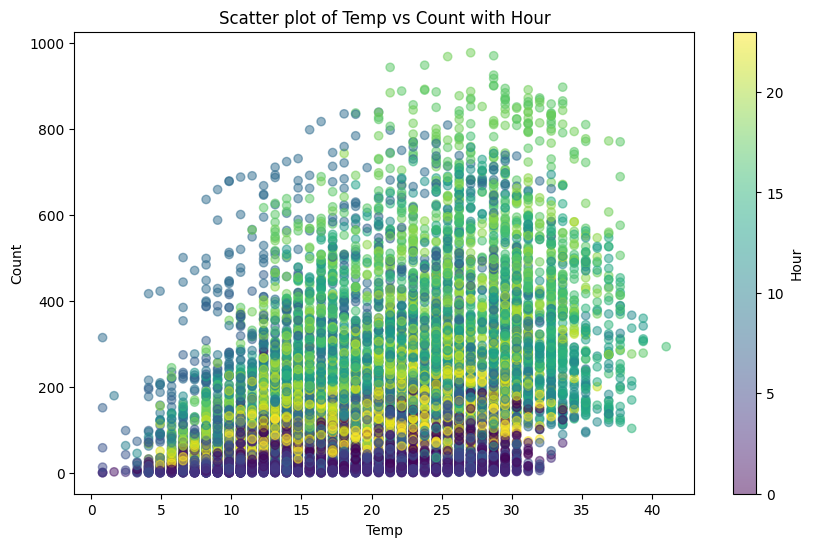

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=train['temp'], y=train['count'], c=train['datetime'].dt.hour, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Hour')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Scatter plot of Temp vs Count with Hour')
plt.show()

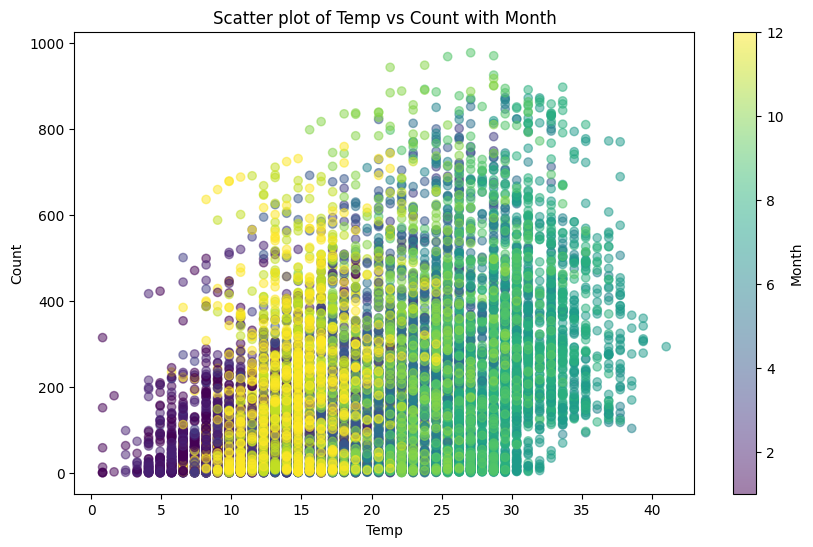

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=train['temp'], y=train['count'], c=train['datetime'].dt.month, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Month')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Scatter plot of Temp vs Count with Month')
plt.show()

### 체감 온도 atemp

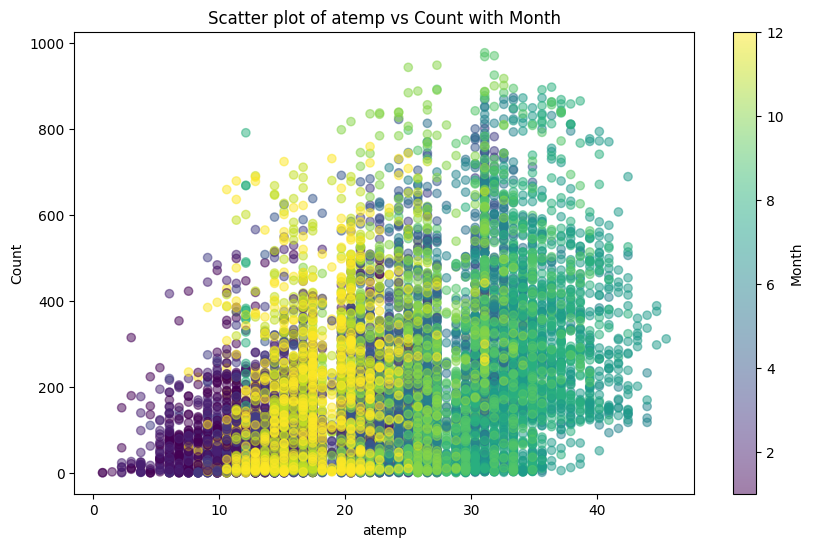

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=train['atemp'], y=train['count'], c=train['datetime'].dt.month, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Month')
plt.xlabel('atemp')
plt.ylabel('Count')
plt.title('Scatter plot of atemp vs Count with Month')
plt.show()

### 습도 humidity

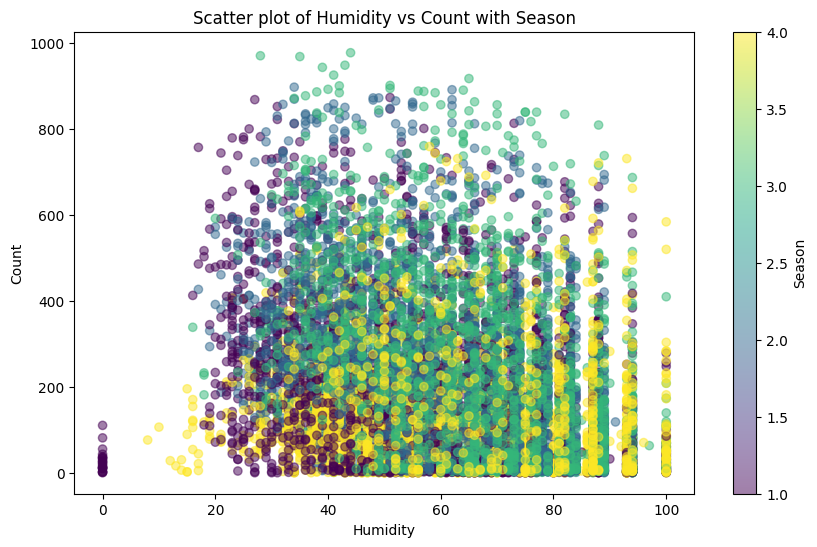

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=train['humidity'], y=train['count'], c=train['season'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Season')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Scatter plot of Humidity vs Count with Season')
plt.show()
# 겨울에도 습도가 높다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  dayofweek   10886 non-null  object        
 16  hour        10886 non-

### 일단 선형회귀를 돌려보자.


In [ ]:
train['dayofweek'] = train['dayofweek'].replace({'Mon': 0, 'Tue': 1, 'Wed': 2,
                                                  'Thu': 3, 'Fri': 4, 'Sat': 5,
                                                  'Sun': 6})
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,22


In [ ]:
data = train.drop(['datetime'],axis=1)
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0
1,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1
2,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2
3,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3
4,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,22


In [ ]:
# data.to_csv('/content/drive/MyDrive/aiffel_research_interview/Data/data.csv', index=False)

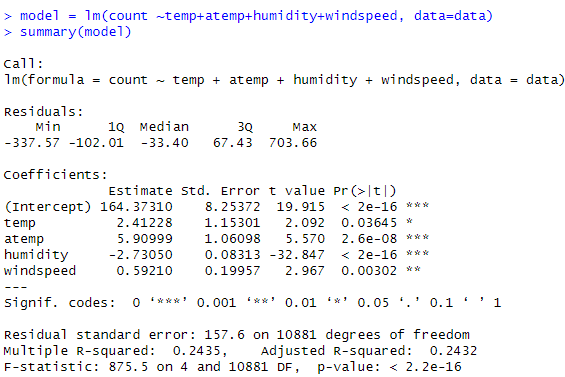

In [ ]:
### R
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/aiffel_research_interview/Data/data_lr.png')
cv2_imshow(img)

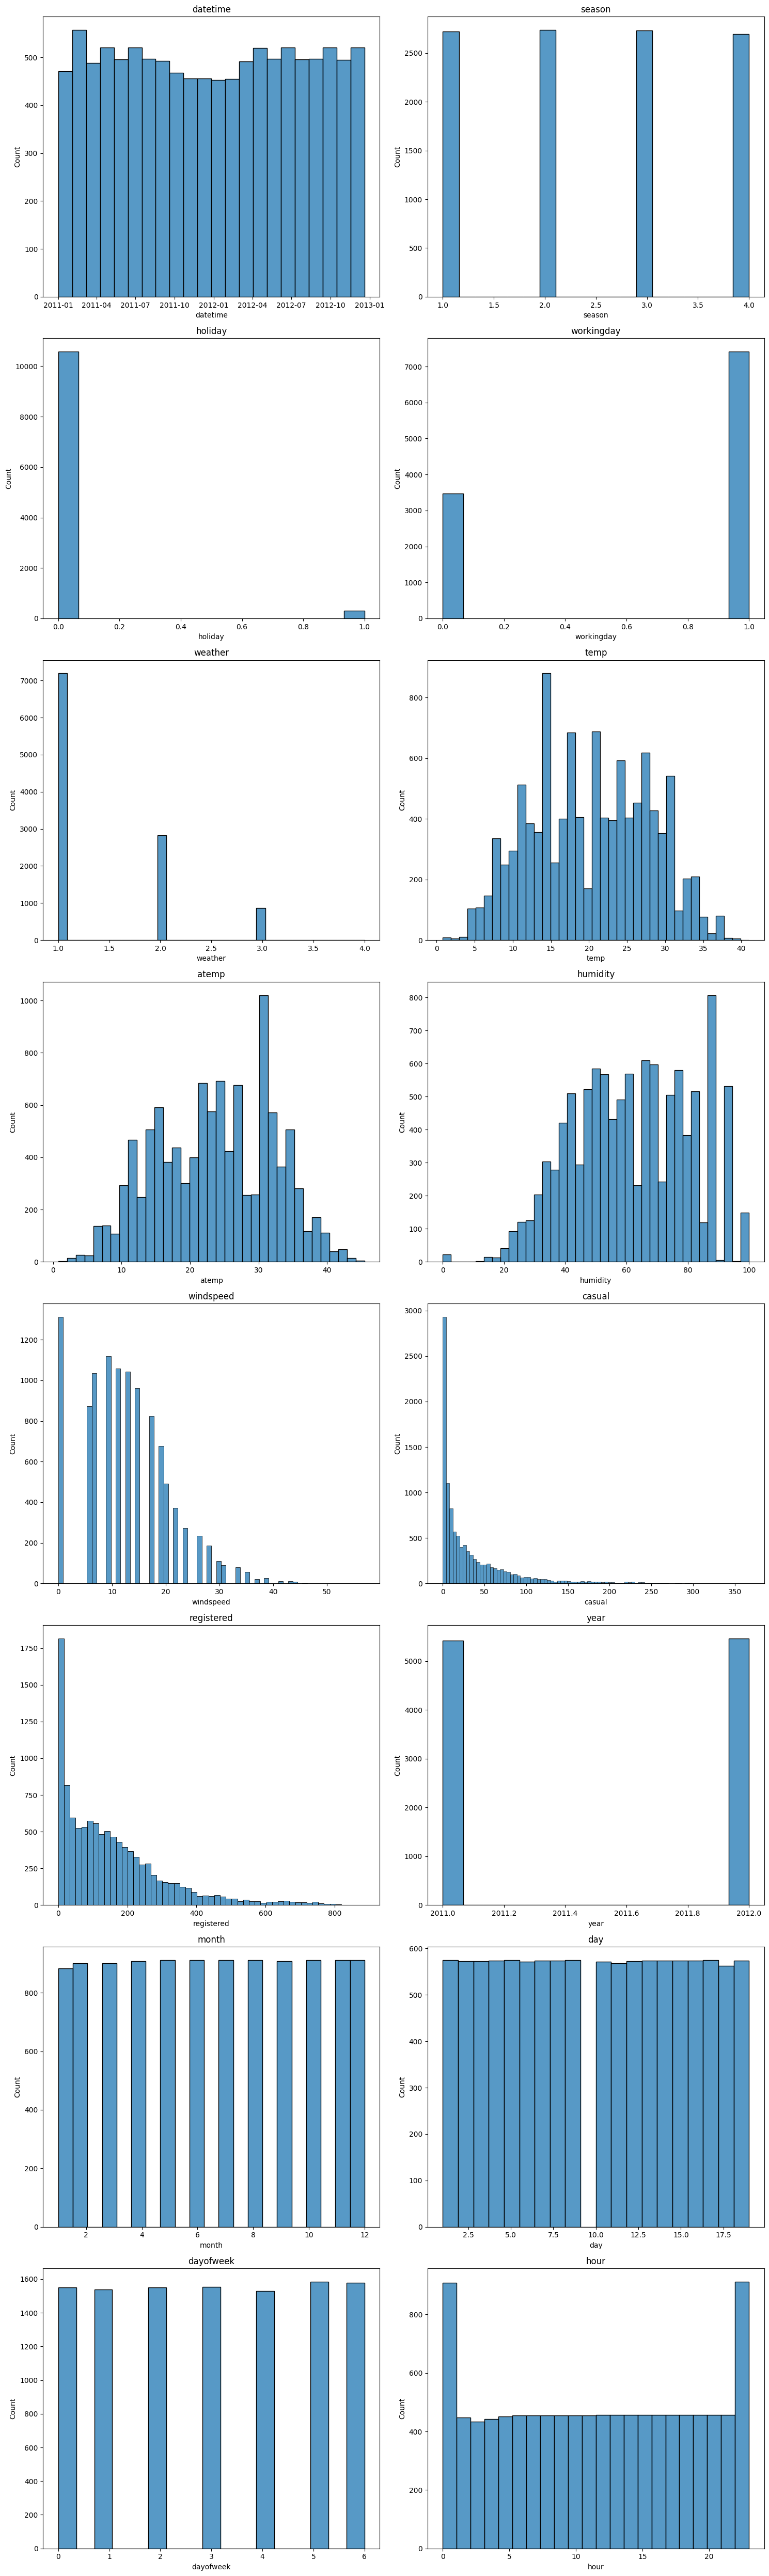

In [ ]:
variables = [col for col in train.columns if col != 'count']
fig, axes = plt.subplots(8, 2, figsize=(15, 10 * 5))
axes = axes.flatten()

for idx, var in enumerate(variables):
    sns.histplot(train[var], ax=axes[idx])
    axes[idx].set_title(f'{var}')

for idx in range(len(variables), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='Count'>

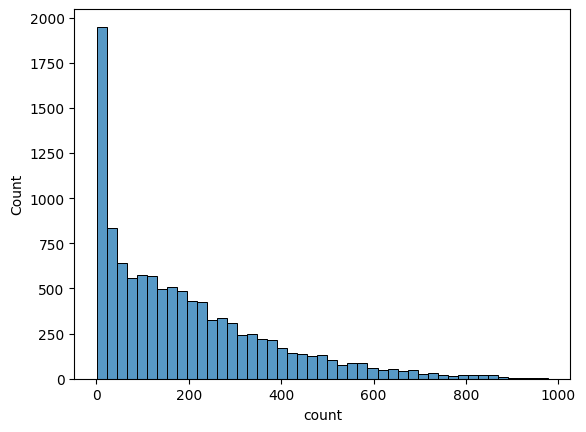

In [ ]:
sns.histplot(train['count'])
## 모델 성능 저하, 모델의 일관성 저하.

<Axes: xlabel='count', ylabel='Count'>

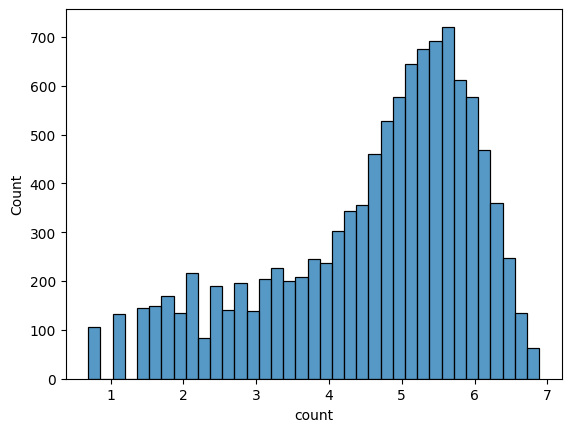

In [ ]:
sns.histplot(np.log1p(train['count']))

In [ ]:
list_dtype = ['int64','int32','float64']

In [ ]:
list_data = train.select_dtypes(include=list_dtype)

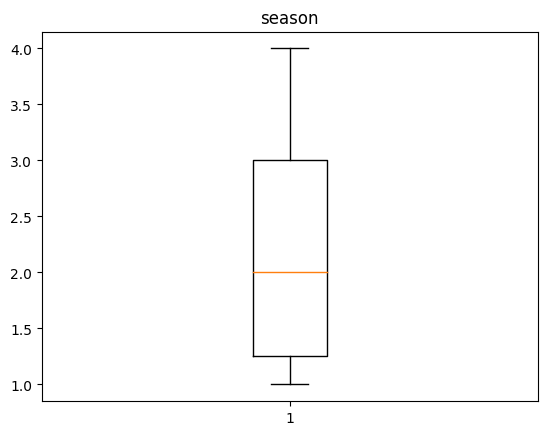

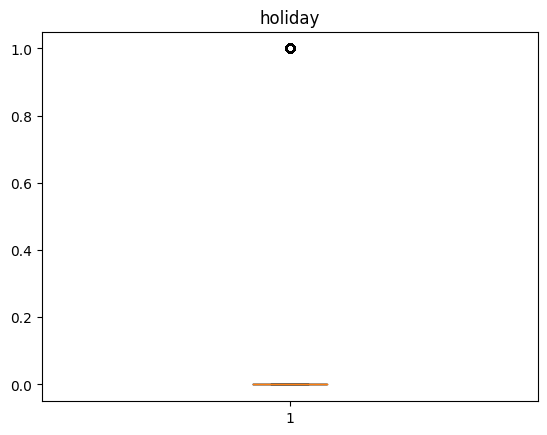

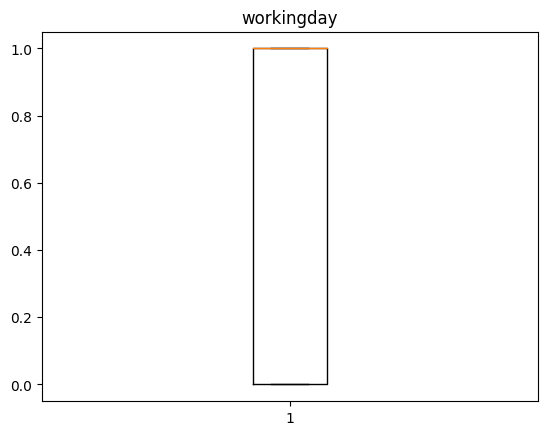

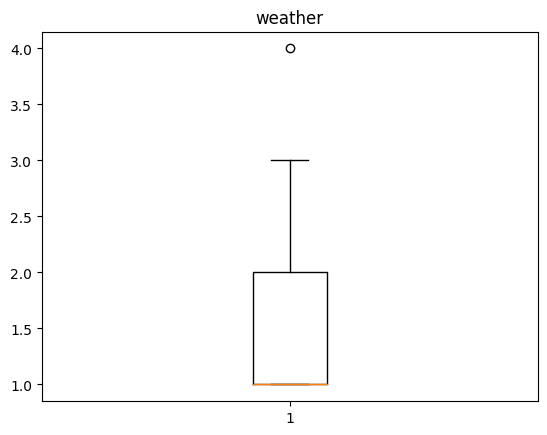

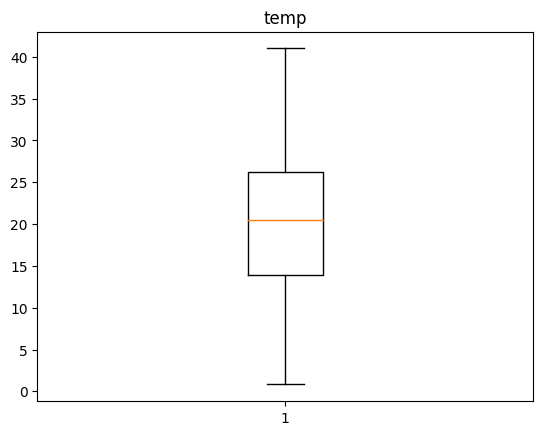

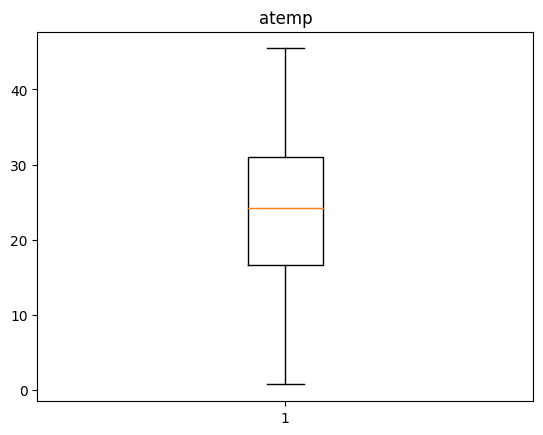

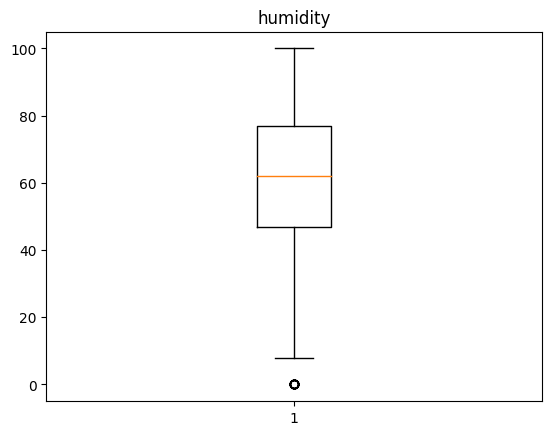

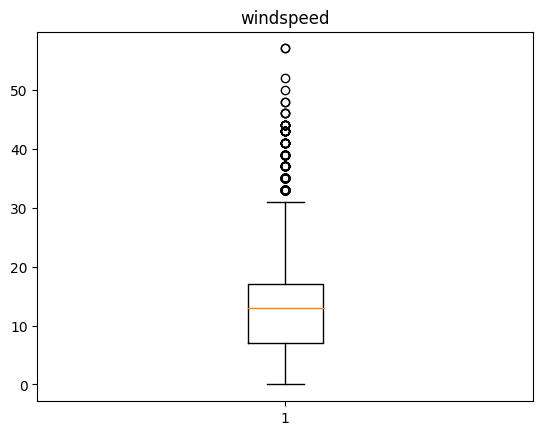

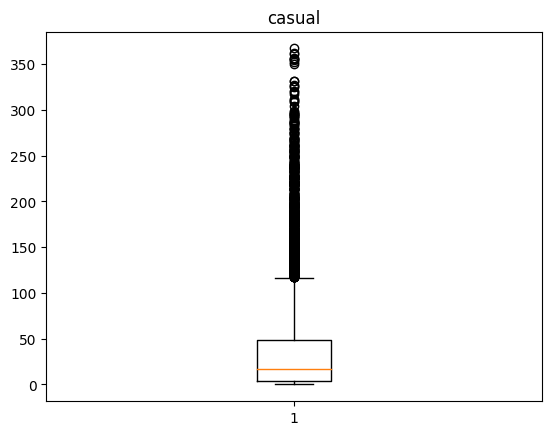

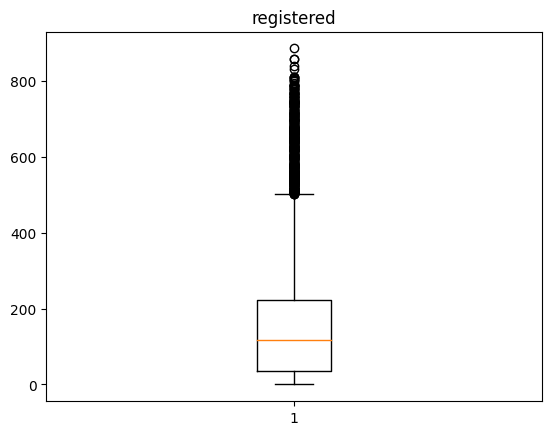

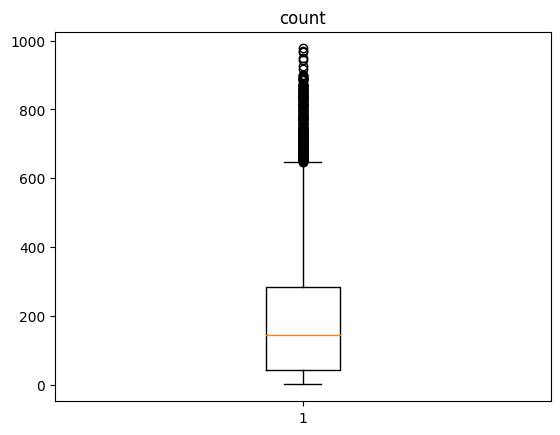

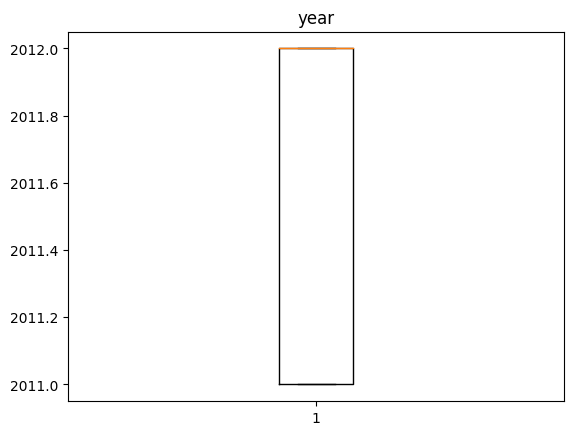

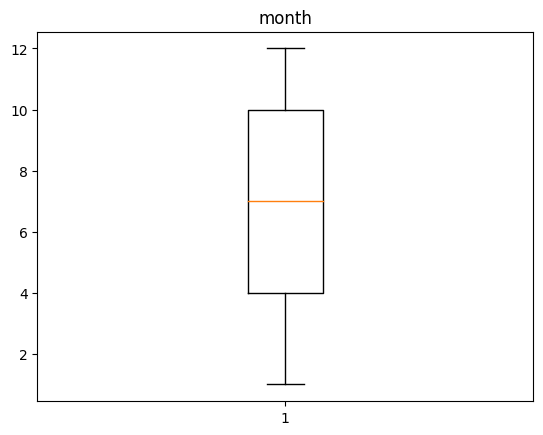

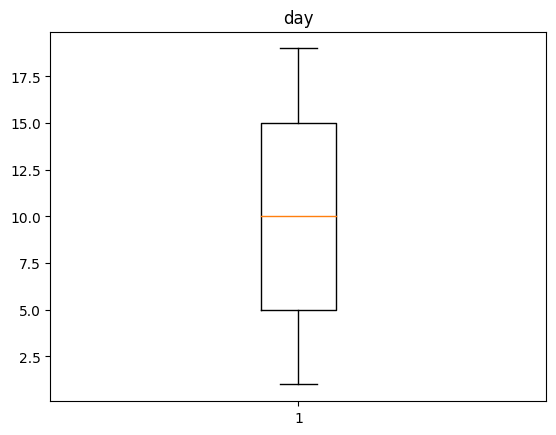

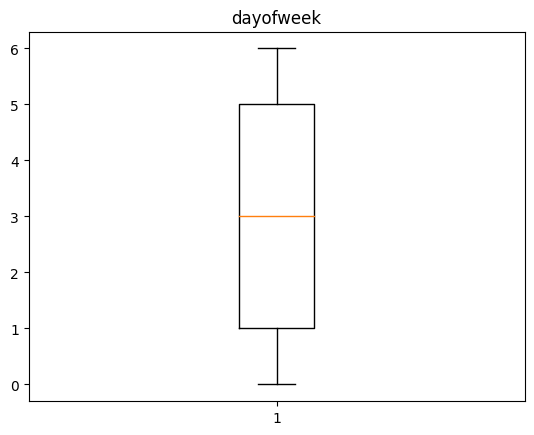

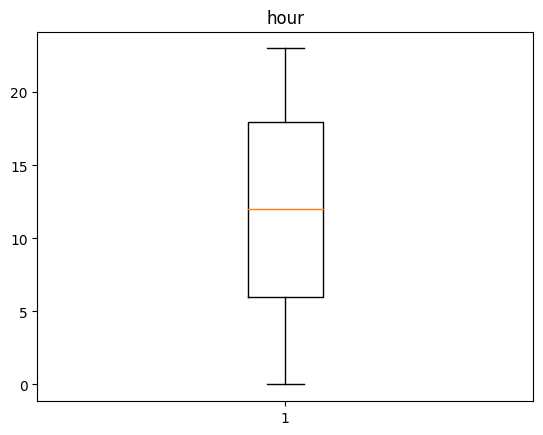

In [ ]:
for col in list_data.columns:
    plt.boxplot(list_data[col])
    plt.title(col)
    plt.show()

In [ ]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month # 사계절
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.day_of_week # 토요일,일요일
test['hour'] = test['datetime'].dt.hour # 아침 점심 저녁 새벽
test['season'] = test['month'].apply(lambda x: 1 if x in [3,4,5] else
                                        2 if x in [6,7,8] else
                                        3 if x in [9,10,11] else
                                          4)

In [ ]:
train = train.drop(['datetime','casual','registered'], axis=1)
train['count'] = np.log1p(train['count'])
test = test.drop(['datetime'], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  float64
 9   year        10886 non-null  int32  
 10  month       10886 non-null  int32  
 11  day         10886 non-null  int32  
 12  dayofweek   10886 non-null  int64  
 13  hour        10886 non-null  int32  
dtypes: float64(4), int32(4), int64(6)
memory usage: 1020.7 KB


In [ ]:
train1 = train.copy()
test1 = test.copy()

## 캐글에서 요구한 성능 평가 방법, RMSLE

The RMSLE (Root Mean Squared Logarithmic Error) is defined as:

$$
\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \log(\hat{y_i} + 1))^2}
$$

* log1p() == 1+log(), expm1() == exp()-1 를 이용
* 이상치의 영향을 덜 받는다.
* 단위에 영향을 받지 않는다.
* 예측값이 실제값보다 작을 때, 더 큰 패널티를 부여한다.



In [ ]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle_value = np.sqrt(np.mean(squared_error))
    return rmsle_value

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train1.drop(['count'], axis=1), train1['count'], test_size=0.2, random_state=2024)
### shuffle=False으로 준다면 데이터의 흐름이 끊겨 있어도 시계열을 적용할 수 있나?

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8708, 13) (8708,)
(2178, 13) (2178,)


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
### count에 log를 한 번 취했기 때문에 되돌리고
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

In [ ]:
rmsle_value = rmsle(y_test_exp, pred_exp)
print(f'RMSLE: {rmsle_value:.20f}')
## 0.7 : RMSLE: 1.0104
## 0.8 : RMSLE: 1.0092

RMSLE: 1.00927609514002125657


<Axes: ylabel='None'>

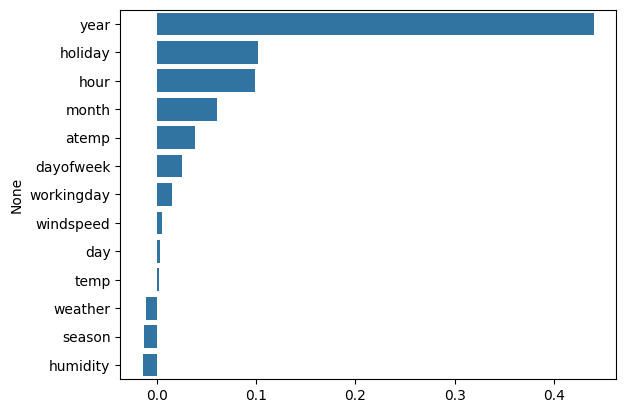

In [ ]:
coef = pd.Series(lr.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 정리
* 선형성이 존재하지 않는 독립변수들이 많다.
* weather에서 4번 value는 드롭한다.
* Holiday 변수는 데이터 불균형 이슈로 제거해보자.
* 다중공선성을(temp,atemp) 검증한다.
* 시즌,날씨,year,month,요일은 범주형 변수로 변환 후, 원-핫 인코딩을 진행한다.


### 이상치 처리

In [ ]:
train2 = train.copy()
test2 = test.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f997358b490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f997358b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f997358b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f997358bf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99709041f0>],
 'means': []}

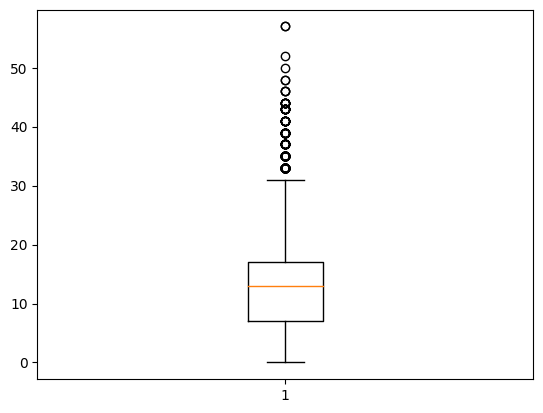

In [ ]:
plt.boxplot(train2['windspeed'])

In [ ]:
train2['windspeed'].describe()

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [ ]:
# Q3 + 1.5*IQR
16.997900+1.5*(16.997900-7.001500)

31.992500000000003

In [ ]:
train2["windspeed"] = np.where(
    (train2["windspeed"]>31.992500000000003),
    np.nan,
    train2["windspeed"]
)
train2.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,227
count,0
year,0


In [ ]:
train2 = train2.dropna()
train2.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
count,0
year,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f997098e080>,
 'caps': [<matplotlib.lines.Line2D at 0x7f997098e4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f997098dde0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f997098e9e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f997098ec80>],
 'means': []}

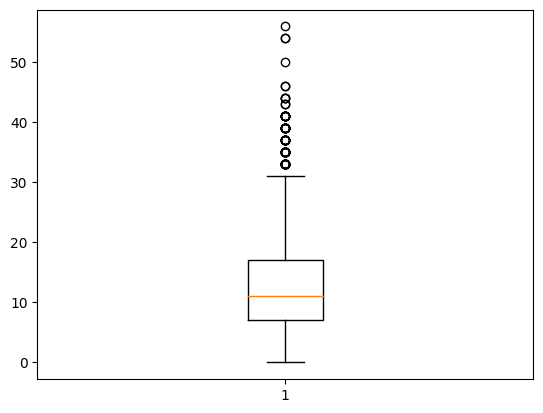

In [ ]:
plt.boxplot(test2['windspeed'])

In [ ]:
test2['windspeed'].describe()

,windspeed
count,6493.000000
mean,12.631157
std,8.250151
min,0.000000
25%,7.001500
50%,11.001400
75%,16.997900
max,55.998600


In [ ]:
# Q3 + 1.5*IQR
16.997900+1.5*(16.997900-7.001500)

31.992500000000003

In [ ]:
test2["windspeed"] = np.where(
    (test2["windspeed"]>31.992500000000003),
    np.nan,
    test2["windspeed"]
)
test2.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,115
year,0
month,0


In [ ]:
test2 = test2.dropna()
test2.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
year,0
month,0


In [ ]:
train2 = train2.drop(['holiday'], axis=1)
test2 = test2.drop(['holiday'], axis=1)

In [ ]:
test2['weather'].value_counts()

,count
weather,
1,4145
2,1688
3,543
4,2


In [ ]:
train2 = train2[train2['weather'] != 4]
train2 = train2.reset_index(drop=True)
test2 = test2[test2['weather'] != 4]
test2 = test2.reset_index(drop=True)

In [ ]:
train2

,season,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,4,0,1,9.84,14.395,81,0.0000,2.833213,2011,1,1,5,0
1,4,0,1,9.02,13.635,80,0.0000,3.713572,2011,1,1,5,1
2,4,0,1,9.02,13.635,80,0.0000,3.496508,2011,1,1,5,2
3,4,0,1,9.84,14.395,75,0.0000,2.639057,2011,1,1,5,3
4,4,0,1,9.84,14.395,75,0.0000,0.693147,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10653,4,1,1,15.58,19.695,50,26.0027,5.820083,2012,12,19,2,19
10654,4,1,1,14.76,17.425,57,15.0013,5.488938,2012,12,19,2,20
10655,4,1,1,13.94,15.910,61,15.0013,5.129899,2012,12,19,2,21
10656,4,1,1,13.94,17.425,61,6.0032,4.867534,2012,12,19,2,22


In [ ]:
test2

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,4,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,4,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,4,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,4,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6371,4,1,2,10.66,12.880,60,11.0014,2012,12,31,0,19
6372,4,1,2,10.66,12.880,60,11.0014,2012,12,31,0,20
6373,4,1,1,10.66,12.880,60,11.0014,2012,12,31,0,21
6374,4,1,1,10.66,13.635,56,8.9981,2012,12,31,0,22


### 다중공선성

<Axes: >

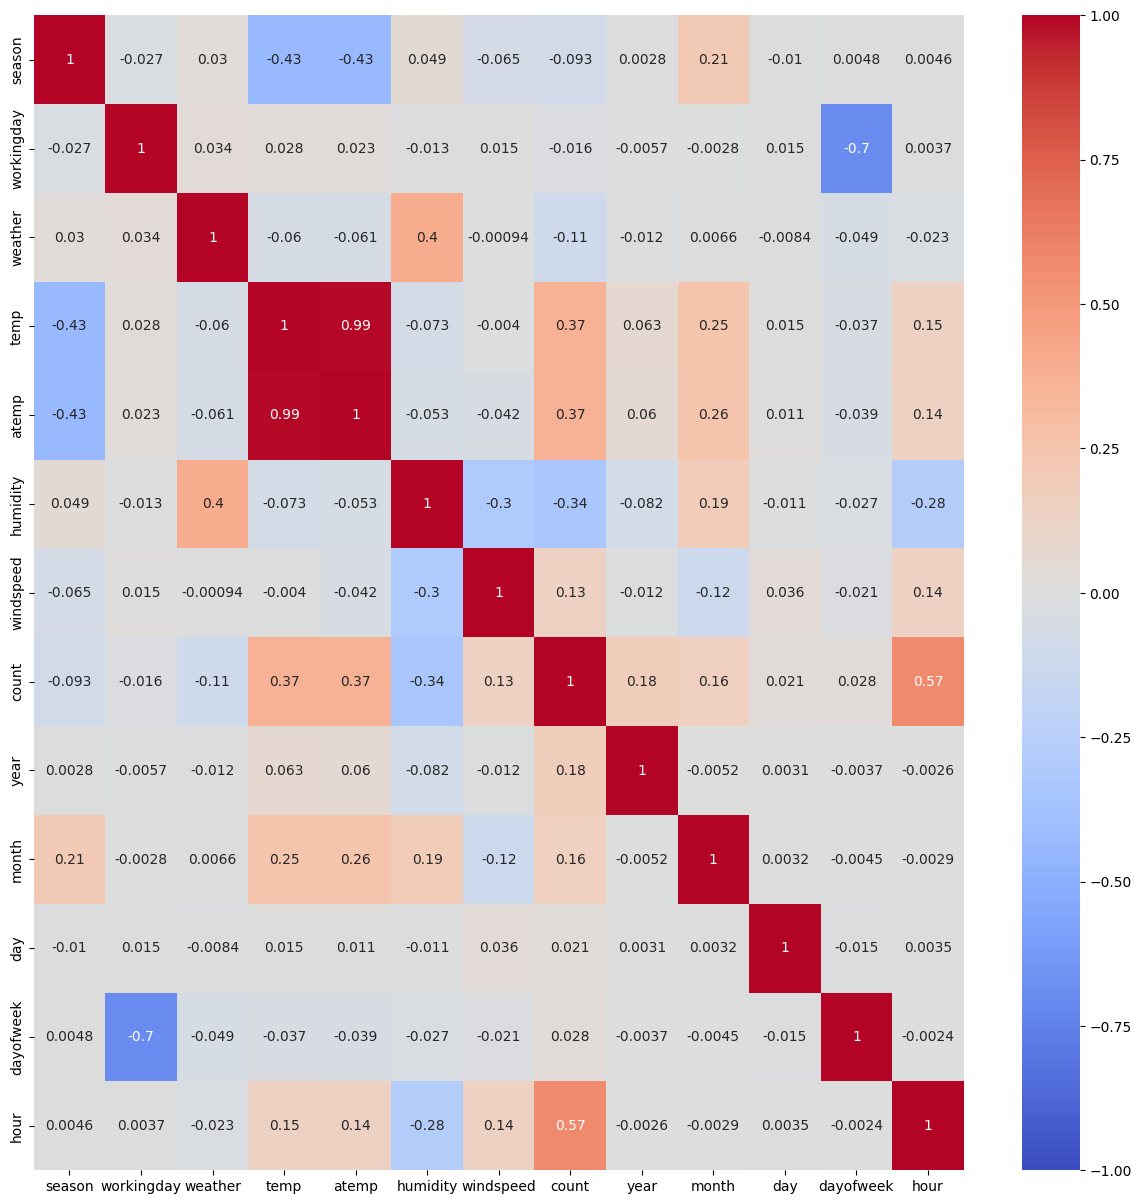

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train2.corr(numeric_only=True),cmap='coolwarm',vmax=1,vmin=-1,annot=True)

In [ ]:
# 다중공선성 검증
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_no_count = train2.drop(columns=['count'])
X = train_no_count.values
vif_data = pd.DataFrame()
vif_data["feature"] = train_no_count.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

       feature         VIF
0       season    8.806216
1   workingday    6.226965
2      weather    7.511423
3         temp  277.767584
4        atemp  319.076360
5     humidity   17.644096
6    windspeed    4.412525
7         year   73.090356
8        month    6.113593
9          day    4.337258
10   dayofweek    6.519013
11        hour    4.232950


In [ ]:
### 예상한대로 temp와 atemp의 분산팽창계수가 높다. 또한, year 변수 역시 높다.

In [ ]:
train_no_count_and_temp = train_no_count.drop(columns=['temp'])
X = train_no_count_and_temp.values
vif_data = pd.DataFrame()
vif_data["feature"] = train_no_count_and_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

       feature        VIF
0       season   8.791813
1   workingday   6.210716
2      weather   7.503895
3        atemp  13.607435
4     humidity  17.556734
5    windspeed   4.264527
6         year  71.556635
7        month   6.101443
8          day   4.335570
9    dayofweek   6.506320
10        hour   4.232498


In [ ]:
train_no_count_and_temp_year = train_no_count_and_temp.drop(columns=['year'])
train_no_count_and_temp_year.values
X = train_no_count_and_temp_year.values
vif_data = pd.DataFrame()
vif_data["feature"] = train_no_count_and_temp_year.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

      feature        VIF
0      season   6.742840
1  workingday   4.874163
2     weather   7.476544
3       atemp   9.878586
4    humidity  13.461388
5   windspeed   3.691320
6       month   6.028662
7         day   4.147342
8   dayofweek   4.947220
9        hour   4.070198


In [ ]:
train3 = train2.copy()
test3 = test2.copy()

In [ ]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10658 non-null  int64  
 1   workingday  10658 non-null  int64  
 2   weather     10658 non-null  int64  
 3   temp        10658 non-null  float64
 4   atemp       10658 non-null  float64
 5   humidity    10658 non-null  int64  
 6   windspeed   10658 non-null  float64
 7   count       10658 non-null  float64
 8   year        10658 non-null  int32  
 9   month       10658 non-null  int32  
 10  day         10658 non-null  int32  
 11  dayofweek   10658 non-null  int64  
 12  hour        10658 non-null  int32  
dtypes: float64(4), int32(4), int64(5)
memory usage: 916.0 KB


In [ ]:
### 온도 변수만 제거
train3 = train3.drop(['temp'], axis=1)
test3 = test3.drop(['temp'], axis=1)

In [ ]:
train3['season'] = train3['season'].replace({1 : 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
test3['season'] = test3['season'].replace({1 : 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [ ]:
train3['workingday'] = train3['workingday'].astype(str)
test3['workingday'] = test3['workingday'].astype(str)

In [ ]:
train3['weather'] = train3['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain &  Light Snow'})
test3['weather'] = test3['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain &  Light Snow'})

In [ ]:
train3['year'] = train3['year'].astype(str)
test3['year'] = test3['year'].astype(str)

In [ ]:
train3['month'] = train3['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                          5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                          9: 'September', 10: 'October', 11: 'November', 12: 'December'})
test3['month'] = test3['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                          5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                          9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [ ]:
train3 = train3.drop(['day'],axis=1)
test3 = test3.drop(['day'],axis=1)

In [ ]:
train3['dayofweek'] = train3['dayofweek'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed',
                                                  3: 'Thu', 4: 'Fri', 5: 'Sat',
                                                  6: 'Sun'})
test3['dayofweek'] = test3['dayofweek'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed',
                                                  3: 'Thu', 4: 'Fri', 5: 'Sat',
                                                  6: 'Sun'})

In [ ]:
train3['hour'] = train3['hour'].astype(str)
test3['hour'] = test3['hour'].astype(str)

In [ ]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10658 non-null  object 
 1   workingday  10658 non-null  object 
 2   weather     10658 non-null  object 
 3   atemp       10658 non-null  float64
 4   humidity    10658 non-null  int64  
 5   windspeed   10658 non-null  float64
 6   count       10658 non-null  float64
 7   year        10658 non-null  object 
 8   month       10658 non-null  object 
 9   dayofweek   10658 non-null  object 
 10  hour        10658 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 916.0+ KB


In [ ]:
list = ['season','workingday','weather','year','month','dayofweek','hour']
list

['season', 'workingday', 'weather', 'year', 'month', 'dayofweek', 'hour']

In [ ]:
train3 = pd.get_dummies(train3,columns=list)

In [ ]:
train3.shape

(10658, 58)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train3.drop(['count'], axis=1), train3['count'], test_size=0.3, random_state=2024)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
rmsle_value = rmsle(y_test_exp, pred_exp)
print(f'RMSLE: {rmsle_value:.20f}')

RMSLE: 0.58581252346795742447


<Axes: ylabel='None'>

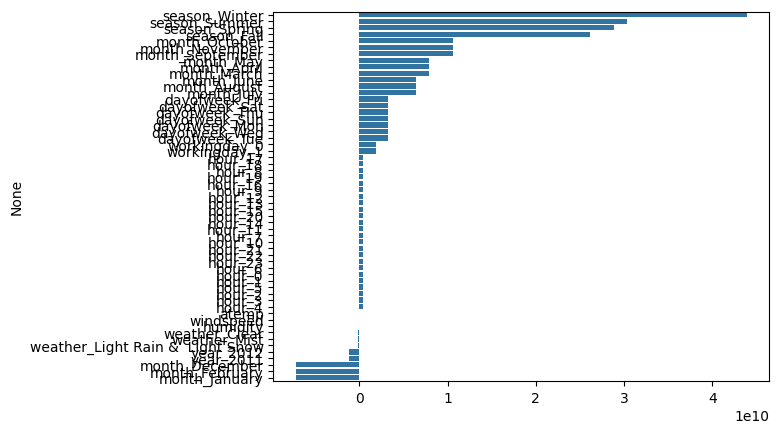

In [ ]:
coef = pd.Series(lr.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
### 시간 변수 고찰

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10658 non-null  int64  
 1   workingday  10658 non-null  int64  
 2   weather     10658 non-null  int64  
 3   temp        10658 non-null  float64
 4   atemp       10658 non-null  float64
 5   humidity    10658 non-null  int64  
 6   windspeed   10658 non-null  float64
 7   count       10658 non-null  float64
 8   year        10658 non-null  int32  
 9   month       10658 non-null  int32  
 10  day         10658 non-null  int32  
 11  dayofweek   10658 non-null  int64  
 12  hour        10658 non-null  int32  
dtypes: float64(4), int32(4), int64(5)
memory usage: 916.0 KB


In [ ]:
train4 = train2.copy()
test4 = test2.copy()

In [ ]:
train4 = train4.drop(['temp','year'], axis=1)
test4 = test4.drop(['temp','year'], axis=1)

In [ ]:
train4['season'] = train4['season'].replace({1 : 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
test4['season'] = test4['season'].replace({1 : 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
train4['workingday'] = train4['workingday'].astype(str)
test4['workingday'] = test4['workingday'].astype(str)
train4['weather'] = train4['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain &  Light Snow'})
test4['weather'] = test4['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain &  Light Snow'})
train4['month'] = train4['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                          5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                          9: 'September', 10: 'October', 11: 'November', 12: 'December'})
test4['month'] = test4['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                          5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                          9: 'September', 10: 'October', 11: 'November', 12: 'December'})
train4['dayofweek'] = train4['dayofweek'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed',
                                                  3: 'Thu', 4: 'Fri', 5: 'Sat',
                                                  6: 'Sun'})
test4['dayofweek'] = test4['dayofweek'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed',
                                                  3: 'Thu', 4: 'Fri', 5: 'Sat',
                                                  6: 'Sun'})
train4 = train4.drop(['day'],axis=1)
test4 = test4.drop(['day'],axis=1)
train4['hour'] = train4['hour'].astype(str)
test4['hour'] = test4['hour'].astype(str)

In [ ]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10658 non-null  object 
 1   workingday  10658 non-null  object 
 2   weather     10658 non-null  object 
 3   atemp       10658 non-null  float64
 4   humidity    10658 non-null  int64  
 5   windspeed   10658 non-null  float64
 6   count       10658 non-null  float64
 7   month       10658 non-null  object 
 8   dayofweek   10658 non-null  object 
 9   hour        10658 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 832.8+ KB


In [ ]:
list = ['season','workingday','weather','month','dayofweek','hour']
print(list)
train4 = pd.get_dummies(train4,columns=list)
print(train4.shape)

['season', 'workingday', 'weather', 'month', 'dayofweek', 'hour']
(10658, 56)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train4.drop(['count'], axis=1), train4['count'], test_size=0.3, random_state=2024)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
rmsle_value = rmsle(y_test_exp, pred_exp)
print(f'RMSLE: {rmsle_value:.20f}')

RMSLE: 0.63473004370719243727


<Axes: ylabel='None'>

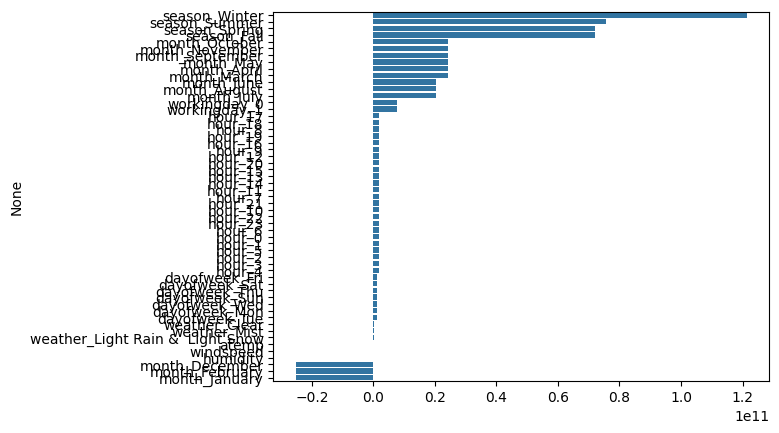

In [ ]:
coef = pd.Series(lr.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

## train3 : RandomForestRegressor RMSLE: 0.3405539577672841 train에서 temp만 제거한
## train4 : RandomForestRegressor RMSLE: 0.40663910230989664 train에서 temp,year을 제거한

RandomForestRegressor RMSLE: 0.4073658027710606


In [ ]:
gbm_reg = GradientBoostingRegressor(n_estimators=500)
gbm_reg.fit(X_train, y_train)
pred = gbm_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('GradientBoostingRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

## train3 : GradientBoostingRegressor RMSLE: 0.327650893128335
## train4 : GradientBoostingRegressor RMSLE: 0.39606096289410814

GradientBoostingRegressor RMSLE: 0.3960781833937724


In [ ]:
xgb_reg = XGBRegressor(n_estimators=500)
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('XGBRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

## train3 : XGBRegressor RMSLE: 0.32570428837293236
## train4 : XGBRegressor RMSLE: 0.38524253624788896

XGBRegressor RMSLE: 0.38524253624788896


In [ ]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
pred = lgbm_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LGBMRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

## train3 : LGBMRegressor RMSLE: 0.2957349323588258
## train4 : LGBMRegressor RMSLE: 0.35621913399064203

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 7460, number of used features: 55
[LightGBM] [Info] Start training from score 4.599493
LGBMRegressor RMSLE: 0.35621913399064203


### 하이퍼파라미터 튜닝

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train3.drop(['count'], axis=1), train3['count'], test_size=0.3, random_state=2024)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'max_depth' : [30,40,50],
    'min_samples_split' : [2,3,4],
    'n_estimators' : [10,100,500]
}
rf2 = RandomForestRegressor()
grid_rf2 = GridSearchCV(rf2, params)
grid_rf2.fit(X_train,y_train)
grid_rf2.best_params_

{'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
rf3 = RandomForestRegressor(n_estimators=500,min_samples_split=2,max_depth=50)
rf3.fit(X_train, y_train)
pred = rf3.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

RandomForestRegressor RMSLE: 0.3392878295227172


In [ ]:
lgbm_reg_l2 = LGBMRegressor(n_estimators=600, learning_rate=0.08, lambda_l2=0.1)
lgbm_reg_l2.fit(X_train, y_train)
pred = lgbm_reg_l2.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LGBMRegressor RMSLE:', rmsle(y_test_exp, pred_exp))

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 7460, number of used features: 57
[LightGBM] [Info] Start training from score 4.599493
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
LGBMRegressor RMSLE: 0.2926675551526081


### 데이터를 최대한 보수적으로 예측하고 싶다?


### train3 데이터로 랜덤포레스트를 돌렸을 때,
* (pred_exp-y_test_exp <= 0).sum() : 예측값 <= 실제값 1738개 더 큰 패널티
* (pred_exp-y_test_exp > 0).sum() : 예측값이 > 실제값 1460개 더 작은 패널티

### day 변수에 대한 고찰
* day 변수를 빼지 않고 train을 학습시킨다면 test에서는 20~말일 이기 때문에 count를 더 큰 값으로 예측할 확률이 높을 것이다.
* 하지만, 이는 평가지표가 RMSLE일 때의 효율을 높일 뿐, 정확한 예측은 아니며, 좁은 목적에 한하여 의미가 가질 확률이 높다.

In [ ]:
# 예측(Prediction), 제출(Submission)
X_train = train3.drop(['count'], axis=1)
y_train = train3['count']
X_test = test3
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(10658, 57)
(10658,)
(6376, 57)


In [ ]:
lgbm_reg_l2 = LGBMRegressor(n_estimators=600, learning_rate=0.08, lambda_l2=0.1)
lgbm_reg_l2.fit(X_train, y_train)
pred = lgbm_reg_l2.predict(X_test)
pred_exp = np.expm1(pred)

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 10658, number of used features: 57
[LightGBM] [Info] Start training from score 4.589615
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [ ]:
pred_exp

array([ 12.00038993,   4.58138907,   2.81602582, ..., 174.57560222,
       123.8502065 ,  64.14970875])

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/aiffel_research_interview/Data/bike_sharing_demand/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0
